In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [3]:
import torch
import torch.nn as nn
from torch import optim

In [4]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [5]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [6]:
loss_fn = nn.CrossEntropyLoss() # 소프트맥스 함수를 포함하고 있는 비용함수

In [7]:
optimizer = optim.Adam(model.parameters()) 

In [8]:
losses = [] #로스 그래프를 만들기위해서 배열 선언 

In [11]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item()) #losses 배열에 loss의 변화를 계속 담는다.

Epoch    0/100 Cost: 2.628857
Epoch   10/100 Cost: 2.141879
Epoch   20/100 Cost: 1.817106
Epoch   30/100 Cost: 1.446440
Epoch   40/100 Cost: 1.097506
Epoch   50/100 Cost: 0.803488
Epoch   60/100 Cost: 0.594629
Epoch   70/100 Cost: 0.448622
Epoch   80/100 Cost: 0.350847
Epoch   90/100 Cost: 0.284441


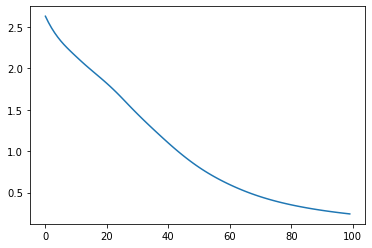

In [12]:
plt.plot(losses) # epoch에 따른 loss 의 변화를 그래프로 나타냈다.